<a href="https://colab.research.google.com/github/Jayanthsai08/Machine_Learning/blob/main/Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression

In [20]:
pd.read_csv("magic04.data")

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("magic04.data",names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [23]:
df["class"]=(df["class"] =="g").astype(int)

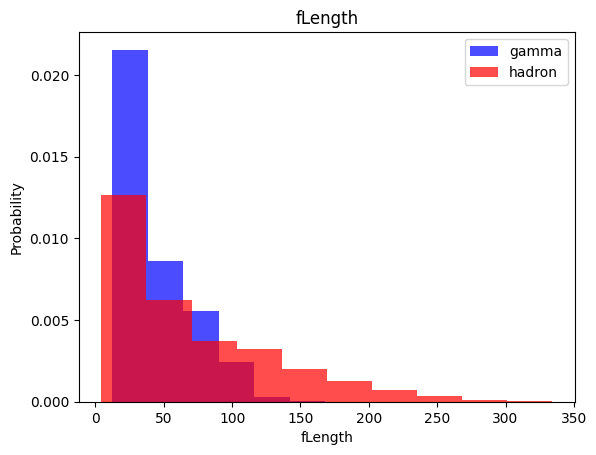

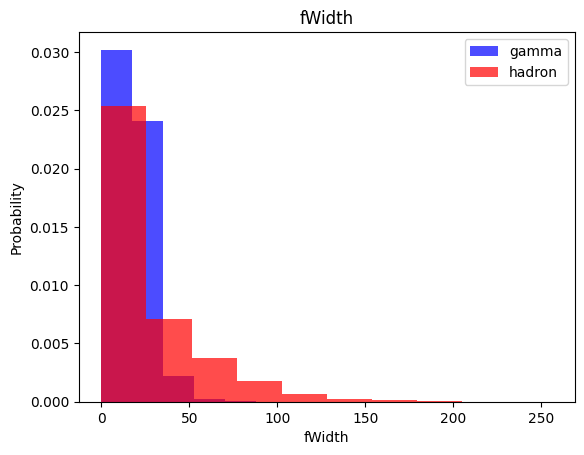

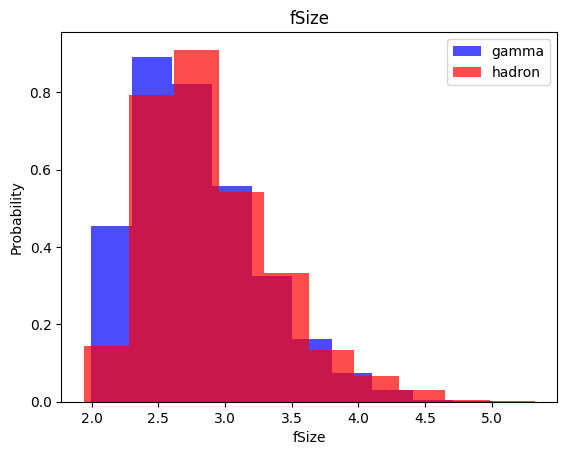

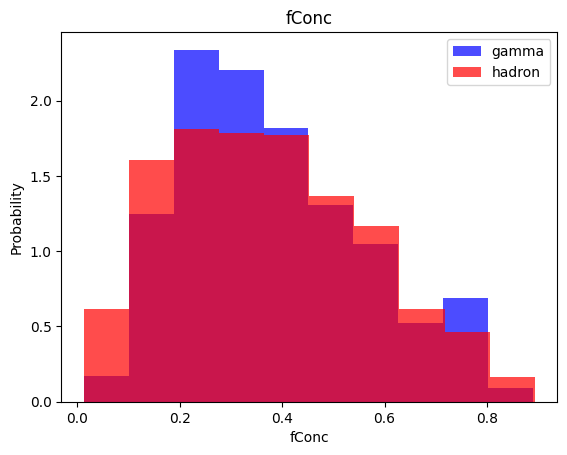

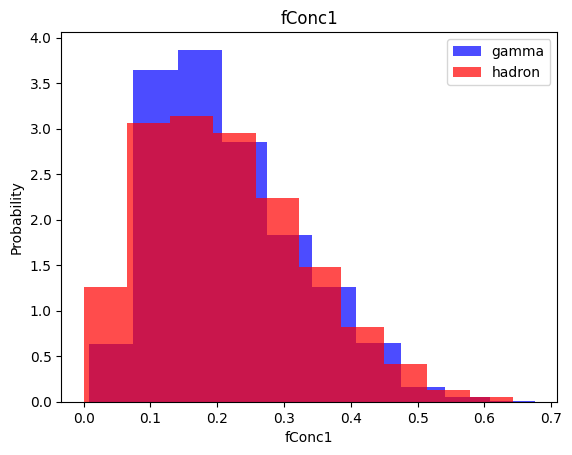

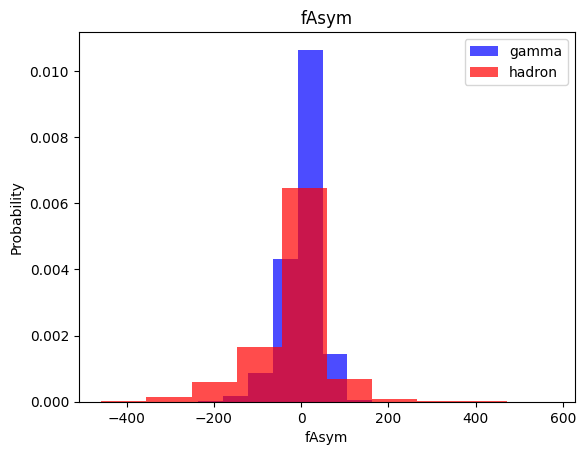

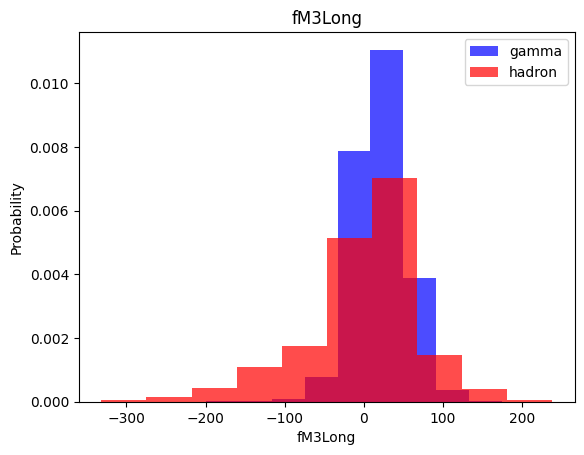

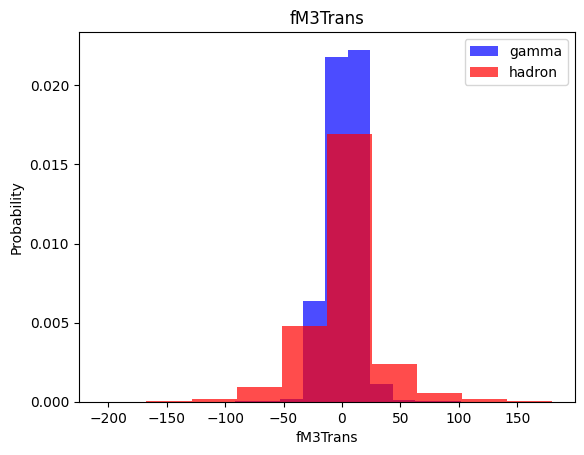

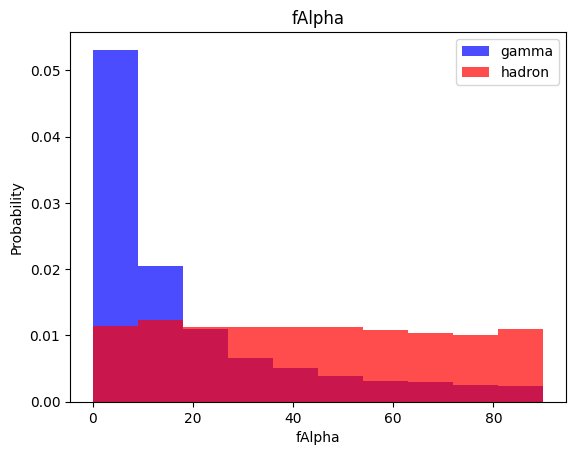

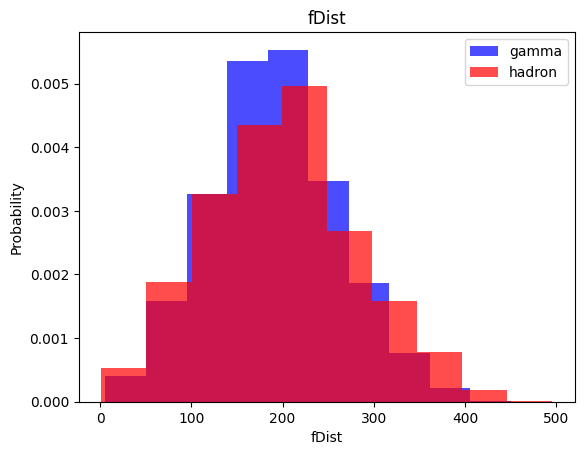

In [24]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [25]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [26]:
train, valid, test=np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
train = pd.DataFrame(train, columns=df.columns)
valid = pd.DataFrame(valid, columns=df.columns)
test = pd.DataFrame(test, columns=df.columns)

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [27]:
def scale_dataset(dataframe, oversample=False):
  if isinstance(dataframe, pd.DataFrame):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
  else: # Assuming it's a numpy array
    x = dataframe[:, :-1]
    y = dataframe[:, -1]


  scaler = StandardScaler()
  X = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler();
    X, y =ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [28]:
train, X_train, y_train = scale_dataset(train, oversample=True)

In [29]:
print(len(train[train[:,-1]==1]))
print(len(train[train[:,-1]==0]))

7352
7352


In [30]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [32]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
y_pred = knn_model.predict(X_test)

In [34]:
y_pred

array([1., 1., 0., ..., 1., 1., 1.])

In [35]:
y_test

array([1, 1, 0, ..., 1, 1, 1])

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1315
           1       0.87      0.82      0.84      2489

    accuracy                           0.80      3804
   macro avg       0.78      0.79      0.79      3804
weighted avg       0.81      0.80      0.80      3804



In [37]:
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [38]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [40]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [43]:
y_pred = nb_model.predict(X_test)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.45      0.51      1315
         1.0       0.74      0.84      0.79      2489

    accuracy                           0.71      3804
   macro avg       0.67      0.65      0.65      3804
weighted avg       0.69      0.71      0.69      3804



Logistic Regression

In [45]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)

In [46]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.63      0.77      0.69      1315
         1.0       0.86      0.76      0.81      2489

    accuracy                           0.76      3804
   macro avg       0.75      0.77      0.75      3804
weighted avg       0.78      0.76      0.77      3804



SVM

In [47]:
from sklearn.svm import SVC

In [48]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [49]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.84      0.78      1315
         1.0       0.91      0.83      0.87      2489

    accuracy                           0.84      3804
   macro avg       0.82      0.84      0.83      3804
weighted avg       0.85      0.84      0.84      3804



Neural Network

In [50]:
import tensorflow as tf

In [51]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_ylabel('Binary crossentropy')
  ax1.set_xlabel('Epoch')
  ax1.grid(True)


  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.grid(True)
  plt.show()

In [52]:
def train_model(X_train, y_train, num_nodes, deopout_prob, lr, batch_size, epochs):

  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes,activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(deopout_prob),
      tf.keras.layers.Dense(int(num_nodes/2),activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])

  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch_size 32


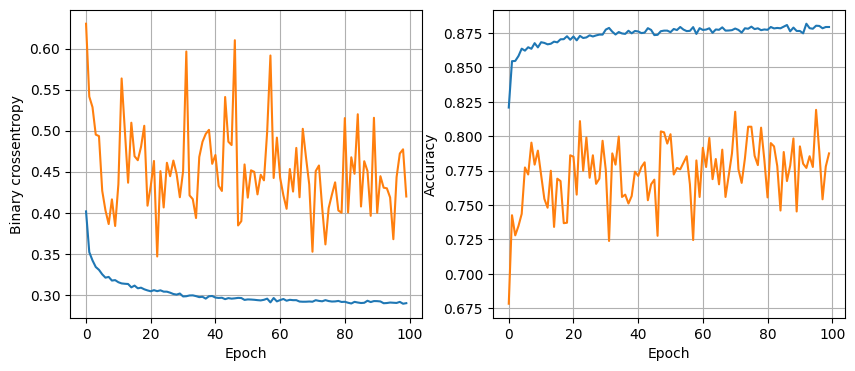

16 nodes, dropout 0, lr 0.01, batch_size 64


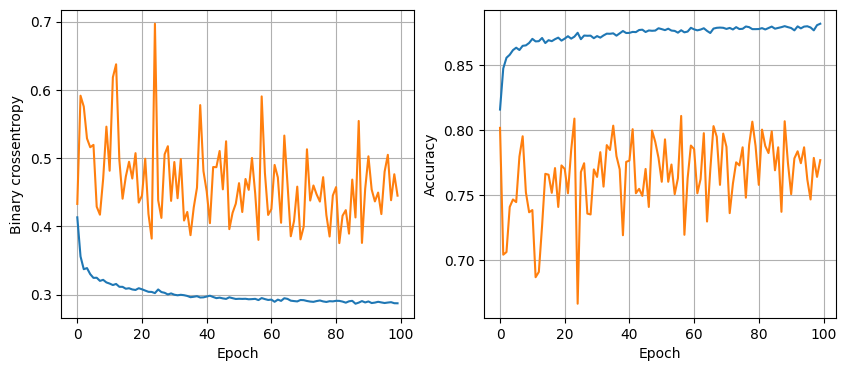

16 nodes, dropout 0, lr 0.01, batch_size 128


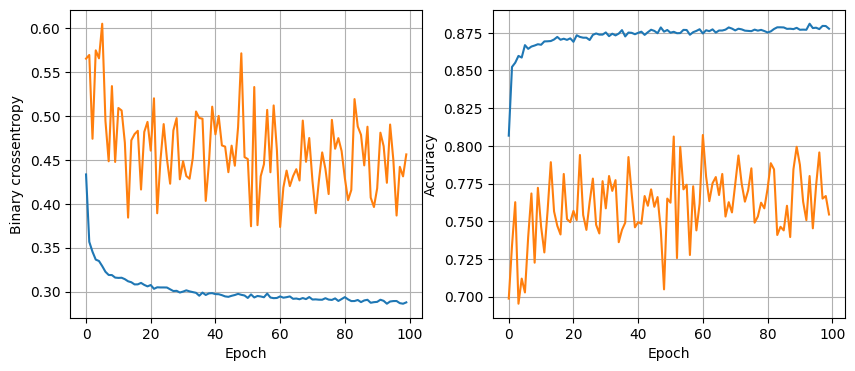

16 nodes, dropout 0, lr 0.005, batch_size 32


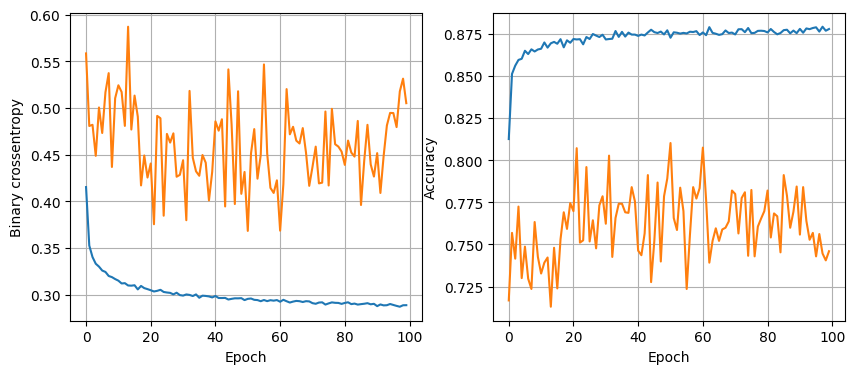

16 nodes, dropout 0, lr 0.005, batch_size 64


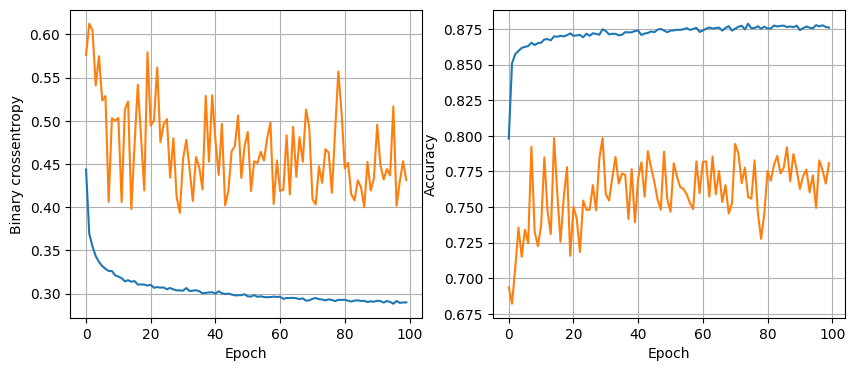

16 nodes, dropout 0, lr 0.005, batch_size 128


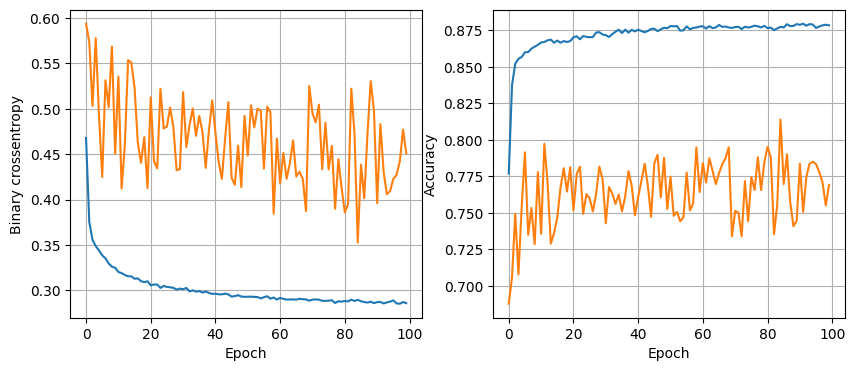

16 nodes, dropout 0, lr 0.001, batch_size 32


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in[32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss= model.evaluate(X_valid, y_valid, verbose=0)
        if val_loss[0] < least_val_loss:
          least_val_loss = val_loss[0]
          least_val_model = model

print("\nClassification Report for the best model on the test set:")
y_pred = least_val_model.predict(X_test)
print(classification_report(y_test, (y_pred > 0.5).astype(int)))

In [54]:
least_loss_model.predict(X_test)

AttributeError: 'NoneType' object has no attribute 'predict'